In [3]:
import tensorflow as tf



In [4]:
data = tf.constant([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

2024-12-26 08:57:03.663477: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2024-12-26 08:57:03.663520: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-12-26 08:57:03.663537: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-12-26 08:57:03.663781: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-26 08:57:03.663799: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
data.shape

TensorShape([10])

In [9]:
user_input = tf.constant(1)

In [10]:
user_input.shape

TensorShape([])

In [11]:
import numpy as np
import tensorflow as tf

from keras import Input
import keras
from keras import regularizers
# from evaluate import evaluate_model
from evaluate import evaluate_model
from Dataset import Dataset
from time import time
import GMF, MLP
import argparse
import multiprocessing as mp

In [12]:
user_input = Input(shape=(1,), dtype='int32', name='user_input')
item_input = Input(shape=(1,), dtype='int32', name='item_input')


In [18]:
 # Embedding layer
num_users = 100
mf_dim = 8
num_items = 100
reg_mf = 0
layers = [64, 32, 16, 8]
reg_layers = [0, 0, 0, 0]
reg_mlp = 0

MF_Embedding_User = keras.layers.Embedding(input_dim=num_users, output_dim=mf_dim, name='mf_embedding_user',
                                            embeddings_initializer=keras.initializers.random_normal(mean=0.0,
                                                                                                    stddev=0.01),
                                            embeddings_regularizer=regularizers.l2(reg_mf))
MF_Embedding_Item = keras.layers.Embedding(input_dim=num_items, output_dim=mf_dim, name='mf_embedding_item',
                                            embeddings_initializer=keras.initializers.random_normal(mean=0.0,
                                                                                                    stddev=0.01),
                                            embeddings_regularizer=regularizers.l2(reg_mf))

MLP_Embedding_User = keras.layers.Embedding(input_dim=num_users, output_dim=int(layers[0] / 2),
                                            name="mlp_embedding_user",
                                            embeddings_initializer=keras.initializers.random_normal(mean=0.0,
                                                                                                    stddev=0.01),
                                            embeddings_regularizer=regularizers.l2(reg_layers[0]))
MLP_Embedding_Item = keras.layers.Embedding(input_dim=num_items, output_dim=int(layers[0] / 2),
                                            name='mlp_embedding_item',
                                            embeddings_initializer=keras.initializers.random_normal(mean=0.0,
                                                                                                    stddev=0.01),
                                                embeddings_regularizer=regularizers.l2(reg_layers[0]))


In [21]:
mf_user_latent =  MF_Embedding_User(user_input)
model = keras.Model(inputs=[user_input, item_input], outputs= mf_user_latent)

In [22]:
model.predict([np.array([1]), np.array([1])])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([[[ 0.0024373 ,  0.00034439, -0.00265584,  0.01091317,
          0.01638315, -0.00462466,  0.00963809,  0.0118891 ]]],
      dtype=float32)

In [24]:
mf_user_latent =  keras.layers.Flatten()(MF_Embedding_User(user_input))
model = keras.Model(inputs=[user_input, item_input], outputs= mf_user_latent)
model.predict([np.array([1]), np.array([1])])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


array([[ 0.0024373 ,  0.00034439, -0.00265584,  0.01091317,  0.01638315,
        -0.00462466,  0.00963809,  0.0118891 ]], dtype=float32)

In [25]:
mf_item_latent =  keras.layers.Flatten()(MF_Embedding_Item(item_input))
model = keras.Model(inputs=[user_input, item_input], outputs= mf_item_latent)
model.predict([np.array([1]), np.array([1])])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


array([[ 0.00301147, -0.00437026,  0.02828471,  0.00213809, -0.00478646,
        -0.00547167,  0.00693694, -0.00182213]], dtype=float32)

In [26]:
mf_vector = keras.layers.Multiply()([mf_user_latent, mf_item_latent])  # element-wise multiply
model = keras.Model(inputs=[user_input, item_input], outputs= mf_vector)
model.predict([np.array([1]), np.array([1])])

/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


array([[ 7.3398687e-06, -1.5050830e-06, -7.5119679e-05,  2.3333323e-05,
        -7.8417266e-05,  2.5304620e-05,  6.6858855e-05, -2.1663524e-05]],
      dtype=float32)

In [31]:
mlp_user_latent = keras.layers.Flatten()(MLP_Embedding_User(user_input)) 
mlp_vector = keras.layers.Concatenate()([mlp_user_latent, mlp_item_latent])
model = keras.Model(inputs=[user_input, item_input], outputs= mlp_user_latent)
model.predict([np.array([1]), np.array([1])])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([[-0.00318527, -0.00406725,  0.01908119,  0.0145901 ,  0.00049247,
         0.00454273,  0.00307294, -0.01821218,  0.00916872, -0.00930632,
         0.00187486, -0.01073008, -0.00866817, -0.00038247, -0.00854881,
         0.00304466, -0.00240025, -0.00389397, -0.01787194,  0.0018156 ,
        -0.01646072,  0.00558207,  0.00661896,  0.00322261,  0.00698087,
         0.00977072,  0.00883677,  0.00025657, -0.00387136,  0.00143192,
         0.00092221, -0.01216212]], dtype=float32)

In [32]:
mlp_item_latent = keras.layers.Flatten()(MLP_Embedding_User(item_input))  
model = keras.Model(inputs=[user_input, item_input], outputs= mlp_item_latent)
model.predict([np.array([1]), np.array([1])])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


array([[-0.00318527, -0.00406725,  0.01908119,  0.0145901 ,  0.00049247,
         0.00454273,  0.00307294, -0.01821218,  0.00916872, -0.00930632,
         0.00187486, -0.01073008, -0.00866817, -0.00038247, -0.00854881,
         0.00304466, -0.00240025, -0.00389397, -0.01787194,  0.0018156 ,
        -0.01646072,  0.00558207,  0.00661896,  0.00322261,  0.00698087,
         0.00977072,  0.00883677,  0.00025657, -0.00387136,  0.00143192,
         0.00092221, -0.01216212]], dtype=float32)

In [33]:
mlp_vector = keras.layers.Concatenate()([mlp_user_latent, mlp_item_latent])
model = keras.Model(inputs=[user_input, item_input], outputs= mlp_vector)
model.predict([np.array([1]), np.array([1])])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


array([[-0.00318527, -0.00406725,  0.01908119,  0.0145901 ,  0.00049247,
         0.00454273,  0.00307294, -0.01821218,  0.00916872, -0.00930632,
         0.00187486, -0.01073008, -0.00866817, -0.00038247, -0.00854881,
         0.00304466, -0.00240025, -0.00389397, -0.01787194,  0.0018156 ,
        -0.01646072,  0.00558207,  0.00661896,  0.00322261,  0.00698087,
         0.00977072,  0.00883677,  0.00025657, -0.00387136,  0.00143192,
         0.00092221, -0.01216212, -0.00318527, -0.00406725,  0.01908119,
         0.0145901 ,  0.00049247,  0.00454273,  0.00307294, -0.01821218,
         0.00916872, -0.00930632,  0.00187486, -0.01073008, -0.00866817,
        -0.00038247, -0.00854881,  0.00304466, -0.00240025, -0.00389397,
        -0.01787194,  0.0018156 , -0.01646072,  0.00558207,  0.00661896,
         0.00322261,  0.00698087,  0.00977072,  0.00883677,  0.00025657,
        -0.00387136,  0.00143192,  0.00092221, -0.01216212]],
      dtype=float32)

In [2]:
import numpy as np

# Input matrix A
A = np.array([
    [1, 1, 1, 0, 1],  # p1
    [0, 1, 1, 0, 0],  # p2
    [0, 1, 1, 1, 0],  # p3
    [1, 0, 1, 1, 0]   # p4
])

# Parameters
num_users, num_items = A.shape
K = 2  # Number of latent factors
lambda_reg = 0.1  # Regularization parameter

# Initialize P and Q with random values
P = np.random.rand(num_users, K)  # User latent matrix
Q = np.random.rand(num_items, K)  # Item latent matrix

# Alternating Least Squares (ALS)
for epoch in range(20):  # Number of iterations
    # Update P (fix Q)
    for u in range(num_users):
        A_u = A[u, :]  # Ratings for user u
        Q_T_Q = Q.T @ Q  # Precompute Q^T * Q
        Q_T_Au = Q.T @ A_u.T  # Precompute Q^T * A_u
        P[u, :] = np.linalg.solve(Q_T_Q + lambda_reg * np.eye(K), Q_T_Au)

    # Update Q (fix P)
    for i in range(num_items):
        A_i = A[:, i]  # Ratings for item i
        P_T_P = P.T @ P  # Precompute P^T * P
        P_T_Ai = P.T @ A_i  # Precompute P^T * A_i
        Q[i, :] = np.linalg.solve(P_T_P + lambda_reg * np.eye(K), P_T_Ai)

# Compute reconstructed matrix
reconstructed_A = np.dot(P, Q.T)

# Print results
print("Latent User Matrix (P):\n", P)
print("Latent Item Matrix (Q):\n", Q)
print("Reconstructed Matrix:\n", reconstructed_A)

Latent User Matrix (P):
 [[0.15873176 1.16479377]
 [0.15857275 0.74826015]
 [0.76240121 0.49144516]
 [1.09746911 0.09673466]]
Latent Item Matrix (Q):
 [[ 0.49246713  0.38599305]
 [ 0.14893643  1.00889161]
 [ 0.78809511  0.83045304]
 [ 0.99501838 -0.08480557]
 [-0.14669155  0.56443162]]
Reconstructed Matrix:
 [[ 0.52777248  1.1987916   1.09240225  0.05916002  0.63416183]
 [ 0.36691509  0.77853064  0.74636532  0.09432617  0.39908041]
 [ 0.56515195  0.60936421  1.00896679  0.71692593  0.16554937]
 [ 0.57780637  0.26104792  0.94524363  1.0837983  -0.10638935]]


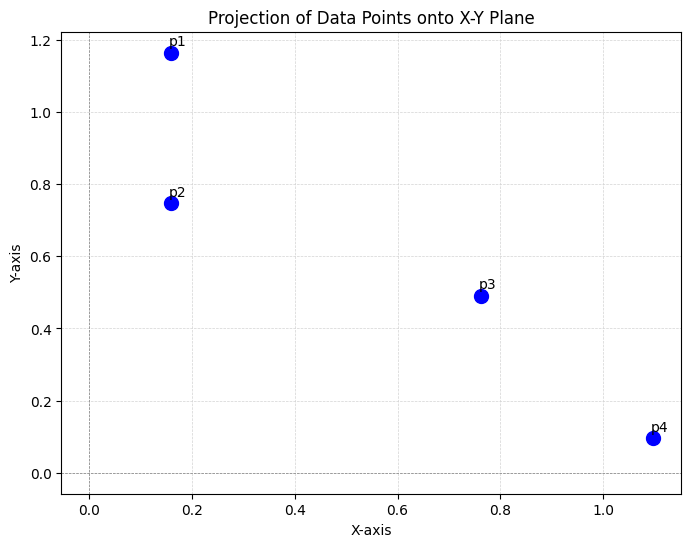

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Data to project
data = np.array([
    [0.15873176, 1.16479377],
    [0.15857275, 0.74826015],
    [0.76240121, 0.49144516],
    [1.09746911, 0.09673466]
])

# Extract x and y coordinates
x_coords = data[:, 0]
y_coords = data[:, 1]

# Labels for points
labels = ['p1', 'p2', 'p3', 'p4']

# Plot the points
plt.figure(figsize=(8, 6))
plt.scatter(x_coords, y_coords, color='blue', s=100)

# Annotate points
for i, label in enumerate(labels):
    plt.annotate(label, (x_coords[i], y_coords[i]), textcoords="offset points", xytext=(5, 5), ha='center')

# Axes and grid
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.title('Projection of Data Points onto X-Y Plane')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Input matrix A
A = np.array([
    [1, 1, 1, 0, 1],  # p1
    [0, 1, 1, 0, 0],  # p2
    [0, 1, 1, 1, 0],  # p3
    [1, 0, 1, 1, 0]   # p4
])

# Perform PCA to project the data into 2D (x, y coordinates)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
projected = pca.fit_transform(A)

# Extract x and y coordinates
x_coords = projected[:, 0]
y_coords = projected[:, 1]

# Labels for points
labels = ['p1', 'p2', 'p3', 'p4']

# Plot the points
plt.figure(figsize=(8, 6))
plt.scatter(x_coords, y_coords, color='blue', s=100)

# Annotate points
for i, label in enumerate(labels):
    plt.annotate(label, (x_coords[i], y_coords[i]), textcoords="offset points", xytext=(5, 5), ha='center')

# Axes and grid
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.title('Projection of Matrix A onto X-Y Plane')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
plt.show()